In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

import nnfs.datasets
import nnfs

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from model.neural_network import NeuralNetwork

from model.layers.dense import DenseLayer
from model.layers.dropout import DropoutLayer
from model.optimizers.adam import Adam

In [3]:
sns.set_style('darkgrid')

# Regression Testing

In [8]:
x, y = nnfs.datasets.sine_data()

model = NeuralNetwork([
    DenseLayer(1, 16, activation='Tanh'),
    DenseLayer(16, 8, activation='Tanh'),
    DenseLayer(8, 1)
])

model.set(
    loss='MeanSquaredError',
    optimizer=Adam(learning_rate=0.01, decay=1e-4)
)

model.train(x, y, epochs=10000, patience=100, min_delta=0.0001)

epoch: 0, loss: 0.50000, acc: 0.00%, lr: 0.0100000000
epoch: 100, loss: 0.16293, acc: 67.41%, lr: 0.0099019705
epoch: 200, loss: 0.03734, acc: 92.53%, lr: 0.0098048828
epoch: 300, loss: 0.01817, acc: 96.37%, lr: 0.0097096806
epoch: 400, loss: 0.00047, acc: 99.91%, lr: 0.0096163093
epoch: 500, loss: 0.00003, acc: 99.99%, lr: 0.0095247166
epoch: 600, loss: 0.00001, acc: 100.00%, lr: 0.0094348523

Early stopping triggered at epoch 600
Best loss: 0.00003


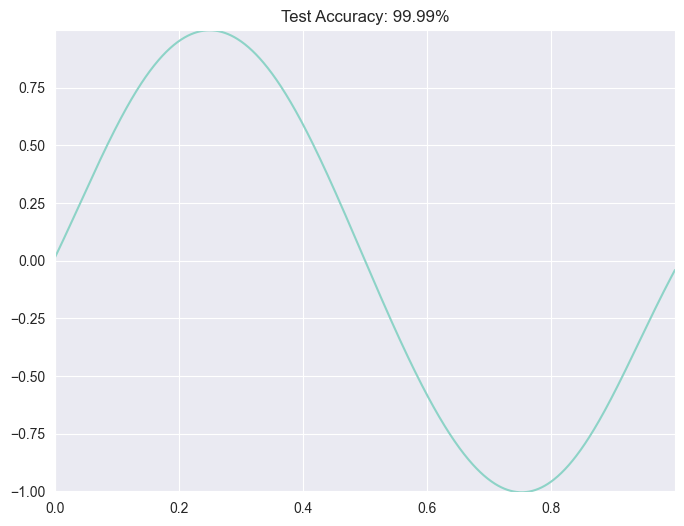

In [9]:
x_test, y_test = nnfs.datasets.sine_data()
accuracy = model.evaluate(x_test, y_test)

outputs = model.forward(x_test)

plt.figure(figsize=(8, 6))
plt.xlim(x_test.min(), x_test.max())
plt.ylim(outputs.min(), outputs.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.plot(x_test, outputs)
plt.show()

# Classification Testing

In [26]:
x, y = nnfs.datasets.spiral_data(1000, classes=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model = NeuralNetwork([
    DenseLayer(2, 128, activation='Relu', weight_regularizer_l2=5e-4),
    DropoutLayer(rate=0.05),
    DenseLayer(128, 64, activation='Relu'),
    DropoutLayer(rate=0.05),
    DenseLayer(64, 1, activation='Sigmoid')
])

model.set(
    loss='BinaryCrossentropy',
    optimizer=Adam(learning_rate=0.001, decay=1e-3)
)

model.train(x_train, y_train, epochs=10000, validation_data=(x_test, y_test), patience=500, min_delta=0.001)

epoch: 0, loss: 0.82904, acc: 48.25%, lr: 0.0010000000
epoch: 100, loss: 0.79038, acc: 62.25%, lr: 0.0009099181
epoch: 200, loss: 0.72980, acc: 63.00%, lr: 0.0008340284
epoch: 300, loss: 0.56252, acc: 78.50%, lr: 0.0007698229
epoch: 400, loss: 0.38256, acc: 90.50%, lr: 0.0007147963
epoch: 500, loss: 0.30742, acc: 94.00%, lr: 0.0006671114
epoch: 600, loss: 0.25643, acc: 94.25%, lr: 0.0006253909
epoch: 700, loss: 0.23165, acc: 95.75%, lr: 0.0005885815
epoch: 800, loss: 0.20742, acc: 96.00%, lr: 0.0005558644
epoch: 900, loss: 0.19708, acc: 97.00%, lr: 0.0005265929
epoch: 1000, loss: 0.19077, acc: 97.50%, lr: 0.0005002501
epoch: 1100, loss: 0.17967, acc: 97.00%, lr: 0.0004764173
epoch: 1200, loss: 0.17072, acc: 97.25%, lr: 0.0004547522
epoch: 1300, loss: 0.15050, acc: 97.00%, lr: 0.0004349717
epoch: 1400, loss: 0.15907, acc: 97.25%, lr: 0.0004168404
epoch: 1500, loss: 0.15021, acc: 98.25%, lr: 0.0004001601
epoch: 1600, loss: 0.14177, acc: 97.25%, lr: 0.0003847634
epoch: 1700, loss: 0.13570

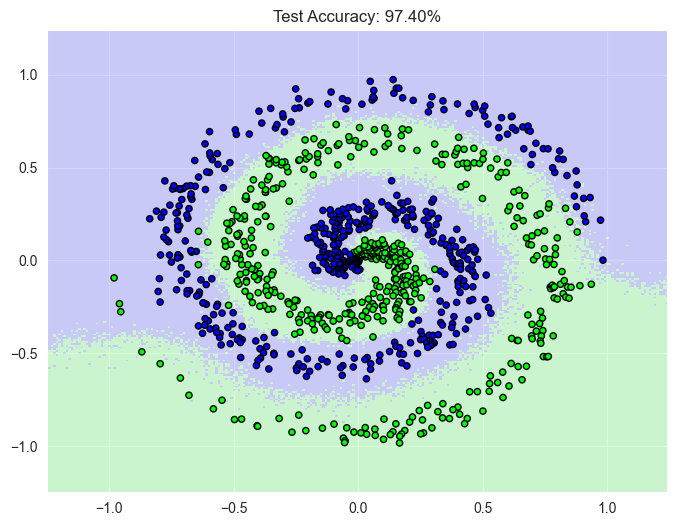

In [27]:
x_test, y_test = nnfs.datasets.spiral_data(samples=500, classes=2)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = (grid_outputs > 0.5).astype(int).reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

y_test = y_test.reshape(-1, 1)
accuracy = model.evaluate(x_test, y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.show()

In [7]:
x, y = nnfs.datasets.spiral_data(2000, classes=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = NeuralNetwork([
    DenseLayer(2, 256, activation='Relu', weight_regularizer_l2=1e-4),
    DropoutLayer(rate=0.05),
    DenseLayer(256, 128, activation='Relu', weight_regularizer_l2=1e-4),
    DropoutLayer(rate=0.05),
    DenseLayer(128, 3, activation='Softmax')
])

model.set(
    loss='CategoricalCrossentropy',
    optimizer=Adam(learning_rate=0.001, decay=1e-4)
)

model.train(x_train, y_train, epochs=10000, print_every=100, validation_data=(x_test, y_test), patience=500, min_delta=0.001)

epoch: 0, loss: 1.17719, acc: 35.92%, lr: 0.0010000000
epoch: 100, loss: 1.09769, acc: 44.00%, lr: 0.0009901970
epoch: 200, loss: 0.67663, acc: 78.08%, lr: 0.0009804883
epoch: 300, loss: 0.49802, acc: 83.75%, lr: 0.0009709681
epoch: 400, loss: 0.42769, acc: 86.50%, lr: 0.0009616309
epoch: 500, loss: 0.39344, acc: 86.42%, lr: 0.0009524717
epoch: 600, loss: 0.39593, acc: 87.50%, lr: 0.0009434852
epoch: 700, loss: 0.37712, acc: 87.33%, lr: 0.0009346668
epoch: 800, loss: 0.36655, acc: 87.92%, lr: 0.0009260117
epoch: 900, loss: 0.35398, acc: 88.75%, lr: 0.0009175154
epoch: 1000, loss: 0.35891, acc: 87.58%, lr: 0.0009091736
epoch: 1100, loss: 0.35663, acc: 88.58%, lr: 0.0009009821
epoch: 1200, loss: 0.35048, acc: 88.08%, lr: 0.0008929369
epoch: 1300, loss: 0.33652, acc: 87.58%, lr: 0.0008850341
epoch: 1400, loss: 0.34224, acc: 87.58%, lr: 0.0008772699
epoch: 1500, loss: 0.34671, acc: 88.58%, lr: 0.0008696408
epoch: 1600, loss: 0.33211, acc: 88.00%, lr: 0.0008621433
epoch: 1700, loss: 0.32419

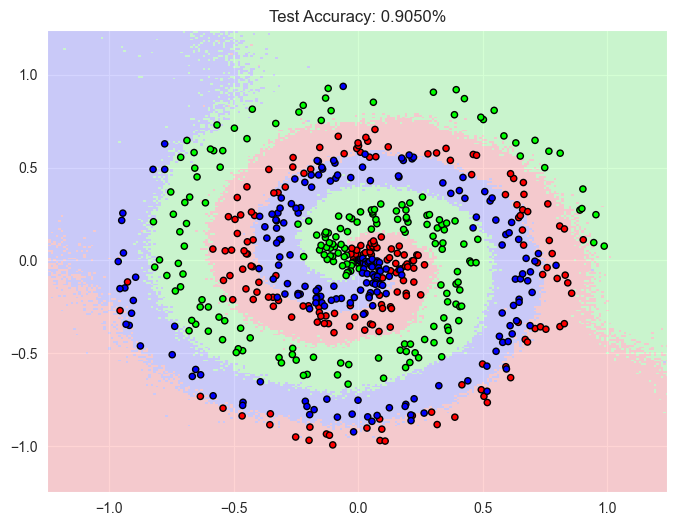

In [8]:
x_test, y_test = nnfs.datasets.spiral_data(samples=200, classes=3)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = np.argmax(grid_outputs, axis=1)
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

predictions = np.argmax(outputs, axis=1)
accuracy = np.mean(predictions == y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.4f}%')
plt.show()